# Language Processing Pipeline

In [1]:
import spacy

In [2]:
nlp = spacy.blank('en')

doc = nlp('Mr. X has become invisible for a day and he really enjoys the day.')

In [3]:
for token in doc:
    print(token)

Mr.
X
has
become
invisible
for
a
day
and
he
really
enjoys
the
day
.


## 1. Download and Import Build in pipeline

In [4]:
nlp = spacy.load('en_core_web_sm')

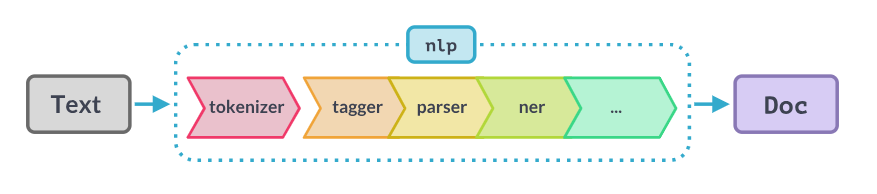

In [5]:
import en_core_web_sm

In [6]:
nlp = en_core_web_sm.load()

### Example 1

In [15]:
doc = nlp('Mr. X has become invisible for a day and he really enjoys the day.')

for token in doc:
    print(token, " | ", token.pos_, " | ", token.lemma_)  #token + parts of speech of token and simplified form of verb used

Mr.  |  PROPN  |  Mr.
X  |  PROPN  |  X
has  |  AUX  |  have
become  |  VERB  |  become
invisible  |  ADJ  |  invisible
for  |  ADP  |  for
a  |  DET  |  a
day  |  NOUN  |  day
and  |  CCONJ  |  and
he  |  PRON  |  he
really  |  ADV  |  really
enjoys  |  VERB  |  enjoy
the  |  DET  |  the
day  |  NOUN  |  day
.  |  PUNCT  |  .


In [11]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [16]:
# nlp.pipe_labels

In [13]:
nlp.pipe_factories

{'tok2vec': 'tok2vec',
 'tagger': 'tagger',
 'parser': 'parser',
 'senter': 'senter',
 'attribute_ruler': 'attribute_ruler',
 'lemmatizer': 'lemmatizer',
 'ner': 'ner'}

In [20]:
## named entity recognition

doc = nlp("AMAZON is multi-bilion company worth over $2000 Bilion .")

for ent in doc.ents:
    print(ent.text, " | ", ent.label_, " | ", spacy.explain(ent.label_))

AMAZON  |  ORG  |  Companies, agencies, institutions, etc.
over $2000 Bilion  |  MONEY  |  Monetary values, including unit


In [22]:
## Displaying the NER in beautiful way

from spacy import displacy
displacy.render(doc, style = 'ent')

### Example 2

In [37]:
## another example of named entity recognition 

doc = nlp("Bloomberg has founded the company BloomBerg back in late 90s'")

# for token in doc:
#     print(token)

for ent in doc.ents:
    print(ent.text, " | ", ent.label_, " | ")

Bloomberg  |  PERSON  | 
BloomBerg  |  ORG  | 
late 90s'  |  DATE  | 


In [39]:
## display the ner 

displacy.render(doc, style = 'ent')

## Customize the piepline

In [44]:
## customize the pipeline in spacy

nlp.pipe_names

source_pipeline = spacy.load('en_core_web_sm')

## let suppose we want only ner/named entity recognition pipeline

nlp = spacy.blank('en')

nlp.pipe_names  #o/p - [], means no pipeline included

## customly adding pipe
nlp.add_pipe('ner', source = source_pipeline)
nlp.pipe_names #o/p -> ['ner'], means only named entity recognition is added/present there

['ner']

In [47]:
doc = nlp('Mr. X is extremely sorry for last night, he wants to say sorry to everyone.')

for ent in doc.ents:
    print(ent.text, " | ", ent.label_, " | ", spacy.explain(ent.label_))

X  |  PERSON  |  People, including fictional
last night  |  TIME  |  Times smaller than a day


In [48]:
## displaying the ner in better ways

displacy.render(doc, style = 'ent')